# Autism Sprectrum Disorder

## Data

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [84]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [85]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [86]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [87]:
train.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

# visualization

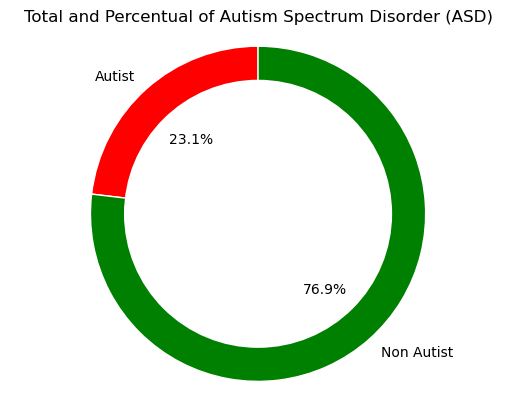

In [88]:
autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['red', 'green']

total_count = len(train)
autist_count = train['Class/ASD'].sum()
non_autist_count = total_count - autist_count

autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100

fig, ax = plt.subplots()

ax.pie([autist_percent, non_autist_percent], labels=[f'Autist', f'Non Autist'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=.4, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


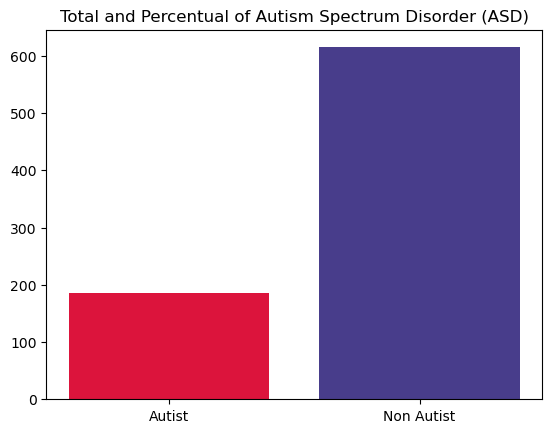

In [89]:
autist_count = train['Class/ASD'].sum()
non_autist_count = len(train) - autist_count

fig, ax = plt.subplots()

ax.bar(['Autist', 'Non Autist'], [autist_count, non_autist_count], color=['crimson', 'darkslateblue'])

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


In [90]:
train["ethnicity"].value_counts()

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

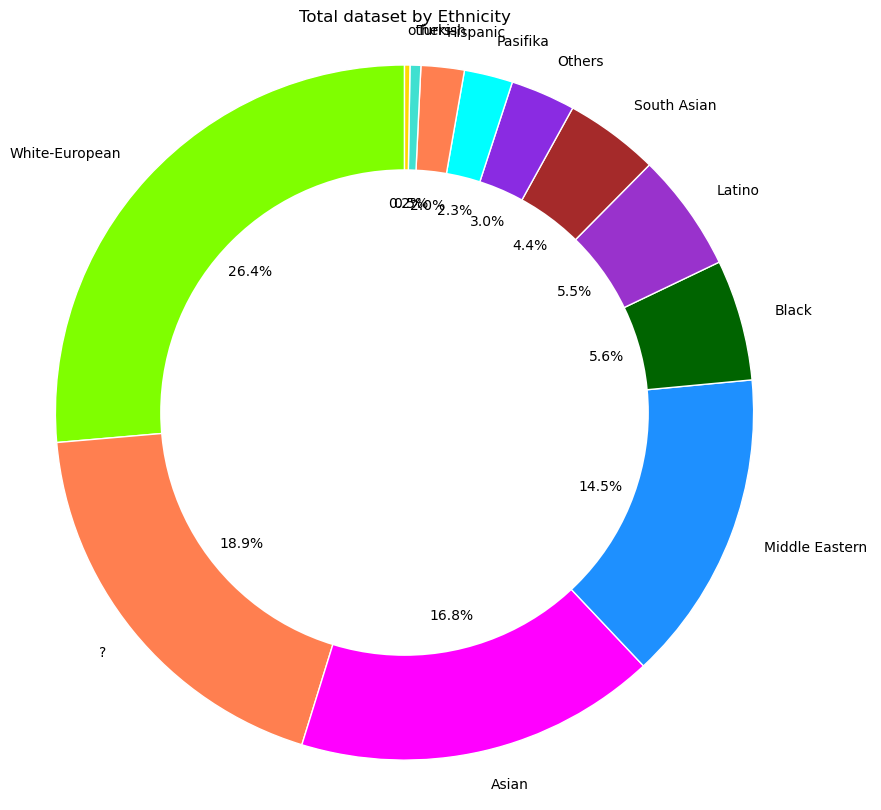

In [91]:
# Define colors for each ethnicity
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan', 'coral', 'Turquoise', 'Gold']

# Plotting the donut chart for ethnicity
fig, ax = plt.subplots(figsize=(10, 10))

# Extract ethnicity counts from the DataFrame
ethnicity_counts = train['ethnicity'].value_counts()

# Draw the donut chart
ax.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90,
       colors=ethnicity_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Total dataset by Ethnicity')
plt.show()


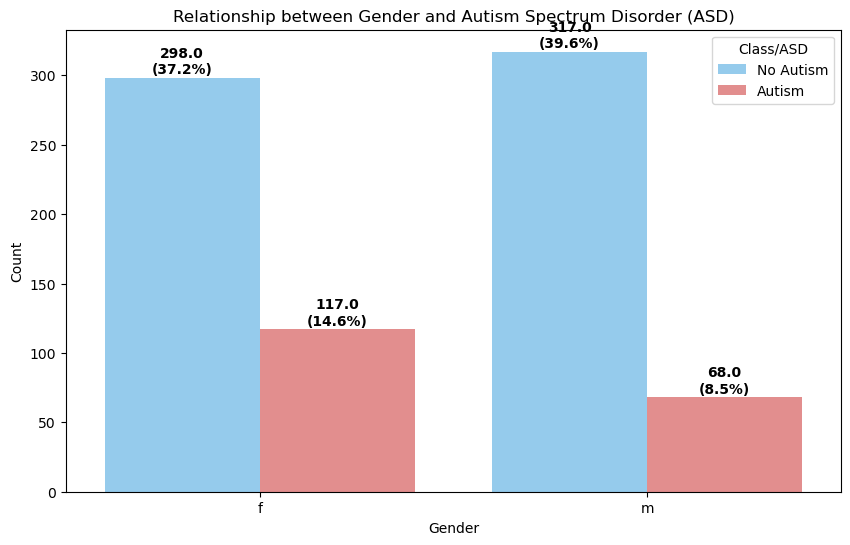

In [92]:
# Define colors for each class
class_colors = {0: 'lightskyblue', 1: 'lightcoral'}


# Plotting the relationship between Gender and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue="Class/ASD", data=train, palette=set(class_colors.values()))

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)')


# Display the plot
plt.show()


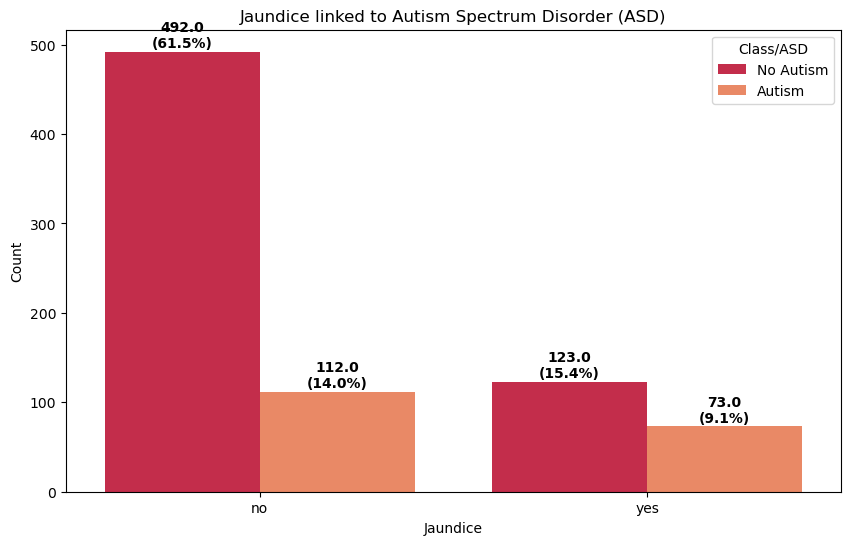

In [93]:
# Define colors for each class
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='jaundice', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


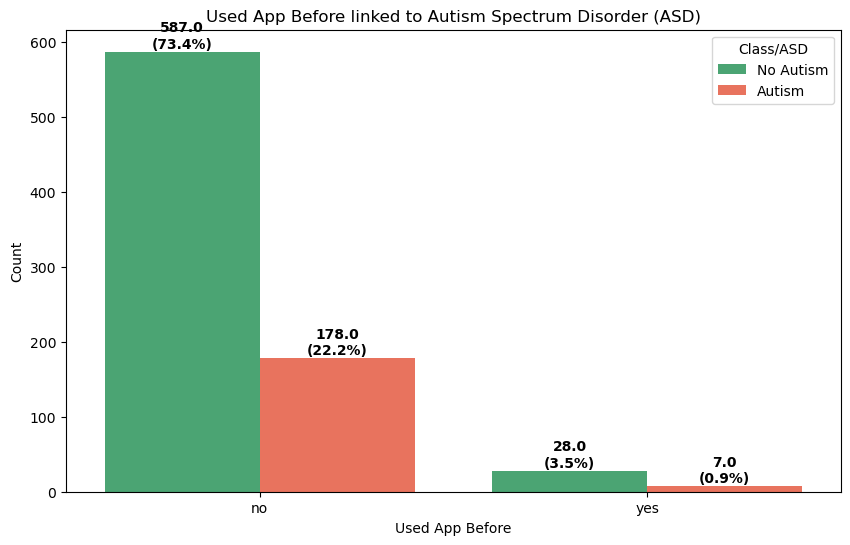

In [94]:
# Define colors for each class
used_app_colors = ['mediumseagreen', 'tomato']
used_app_map = {'yes': 'Used App Before', 'no': 'No App Usage'}

# Plotting the relationship between Used App Before and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='used_app_before', hue='Class/ASD', data=train, palette=used_app_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Used App Before')
plt.ylabel('Count')
plt.title('Used App Before linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


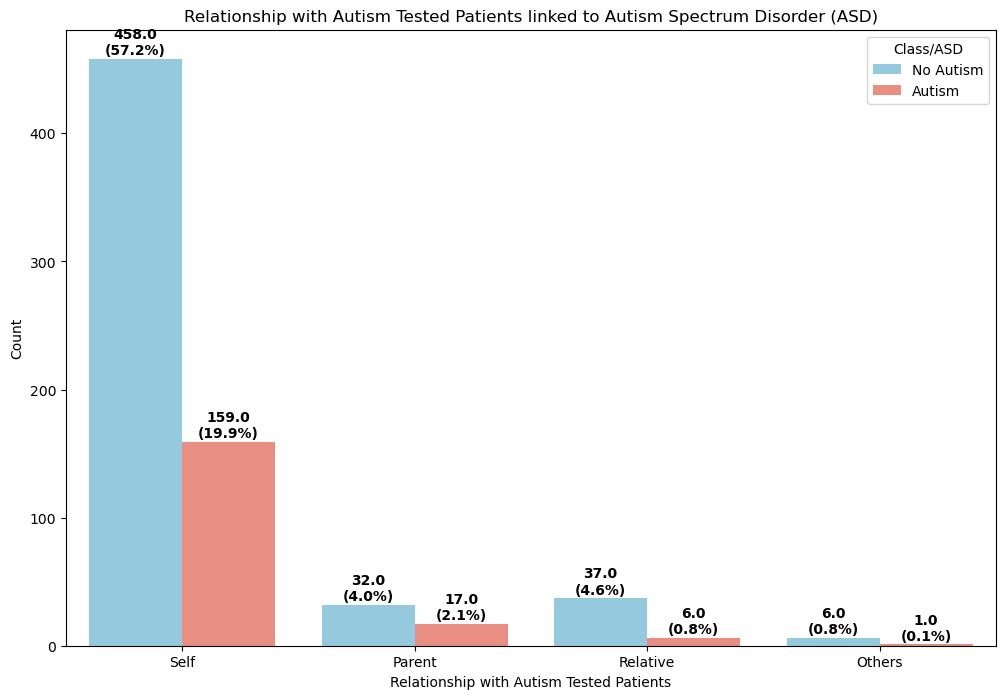

In [95]:
# Define colors for each class
relation_colors = ['skyblue', 'salmon']
relation_map = {'Self': 'Self', 'Parent': 'Parent', 'Relative': 'Relative', 'Others': 'Others'}

# Plotting the relationship with Autism Tested Patients and Class/ASD
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='relation', hue='Class/ASD', data=train, palette=relation_colors, order=['Self', 'Parent', 'Relative', 'Others'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Relationship with Autism Tested Patients')
plt.ylabel('Count')
plt.title('Relationship with Autism Tested Patients linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

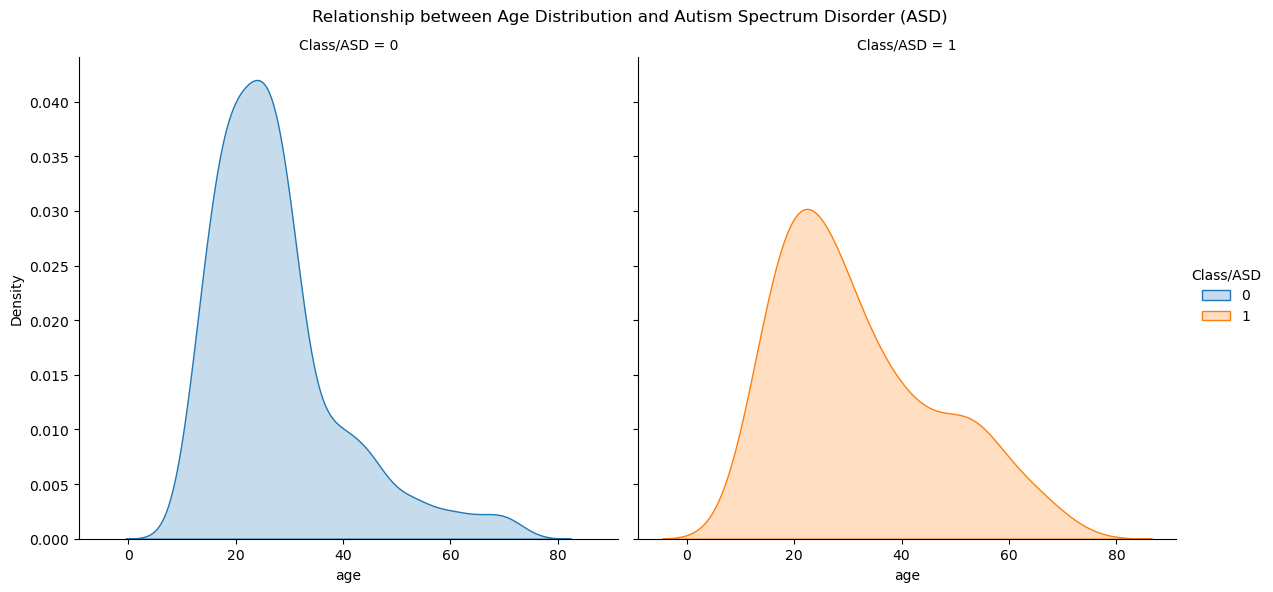

In [96]:
# Plotting the relationship between age distribution and Class/ASD
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(train, col='Class/ASD', hue='Class/ASD', height=6)
g.map(sns.kdeplot, 'age', fill=True)
g.add_legend()

# Setting labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age Distribution and Autism Spectrum Disorder (ASD)')

# Display the plot
plt.show()


# Preprocessing

### 1.Data dosen't have a null value

### 2.Data Encoding

In [97]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [98]:
cat = {'ethnicity':'category',
       'gender':'category', 
       'jaundice':'category',
       'austim':'category',
       'contry_of_res':'category', 
       'used_app_before':'category',
        'age_desc':'category',
        'relation':'category'}
test = test.astype(cat)
train = train.astype(cat)

In [99]:
cat_columns = ['ethnicity', 'gender', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in cat_columns:
    train[col] = train[col].cat.codes
    test[col] = test[col].cat.codes


In [100]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,10,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,0,8,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,10,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,...,0,8,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,...,1,2,0,1,32,0,7.949723,0,5,0


In [101]:
print(train.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender                int8
ethnicity             int8
jaundice              int8
austim                int8
contry_of_res         int8
used_app_before       int8
result             float64
age_desc              int8
relation              int8
Class/ASD            int64
dtype: object


### 3.Drop unuseful data

In [102]:
train=train.drop('ID', axis=1)
train=train.drop('relation', axis=1)

In [103]:
test=test.drop('ID', axis=1)
test=test.drop('relation', axis=1)

### 4.Split Data

In [104]:
X = train.drop('Class/ASD', axis=1)
y = train['Class/ASD']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.Standard Scaler


In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.fit_transform(test)

# Classification

## 1.Random Forest

In [25]:
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = classifier.predict(X_test)

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_rf = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_rf)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[106  15]
 [ 11  28]]
Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.65      0.72      0.68        39

    accuracy                           0.84       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.84      0.84      0.84       160



In [27]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_rf,recall_rf,fscore_rf,support_rf=score(y_val, y_pred)
print(precision_rf)

[0.90598291 0.65116279]


ROC-AUC Score: 0.7969908878999789


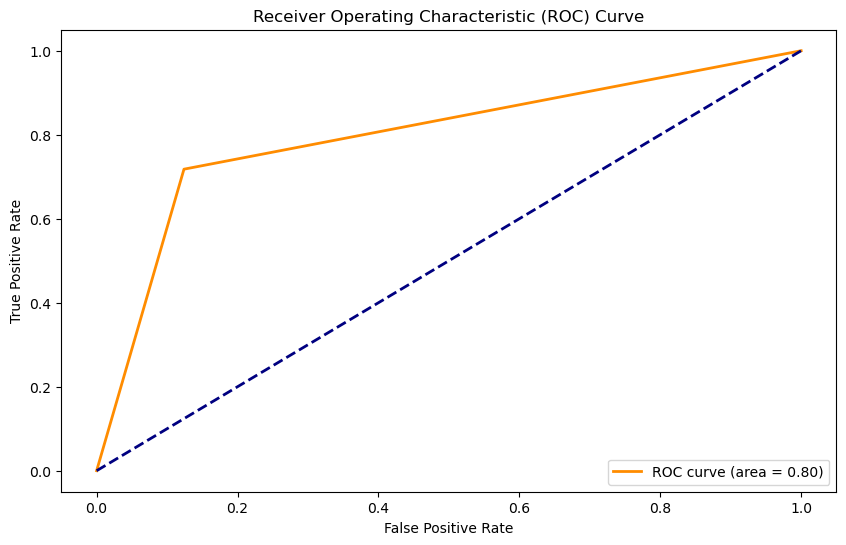

In [28]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2. Decision Tree

In [29]:
dtree = DecisionTreeClassifier(criterion="gini")

# Train the classifier on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = dtree.predict(X_test)

In [30]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_dt = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_dt)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[101  20]
 [ 14  25]]
Accuracy: 0.7875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       121
           1       0.56      0.64      0.60        39

    accuracy                           0.79       160
   macro avg       0.72      0.74      0.73       160
weighted avg       0.80      0.79      0.79       160



In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_dt,recall_dt,fscore_dt,support_dt=score(y_val, y_pred)
print(precision_dt)

[0.87826087 0.55555556]


ROC-AUC Score: 0.737868192413647


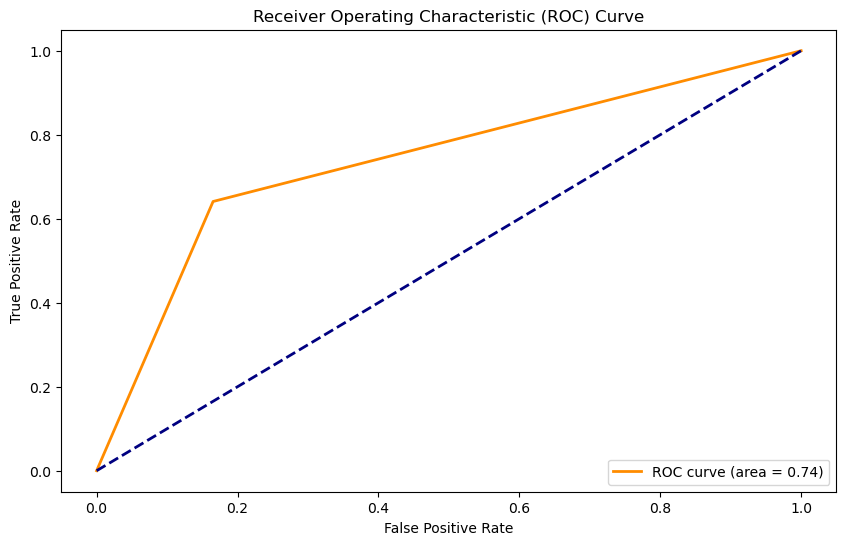

In [32]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 3. ANN model

In [33]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units=15, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the training data
classifier.fit(X_train, y_train, batch_size=32, epochs=50)

# Make predictions on the validation data
y_predict = classifier.predict(X_val)
y_predict = (y_predict > 0.5)

# We can predict for the test dataset given using below code
# y_predict = classifier.predict(X_test)

Epoch 1/50
20/20 [==============================] - 1s 3ms/step - loss: 0.6345 - accuracy: 0.6156
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7891
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8453
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8734
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8781
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8828
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8844
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8859
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.8859
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8891
Epoch 11/50
20/20 [

In [34]:
# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

accuracy_ANN = accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy_ANN)

class_report = classification_report(y_val, y_predict)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[104  17]
 [ 10  29]]
Accuracy: 0.83125
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       121
           1       0.63      0.74      0.68        39

    accuracy                           0.83       160
   macro avg       0.77      0.80      0.78       160
weighted avg       0.84      0.83      0.84       160



In [35]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_ANN,recall_ANN,fscore_ANN,support_ANN=score(y_val, y_predict)
print(precision_ANN)

[0.9122807  0.63043478]


ROC-AUC Score: 0.8015469379105743


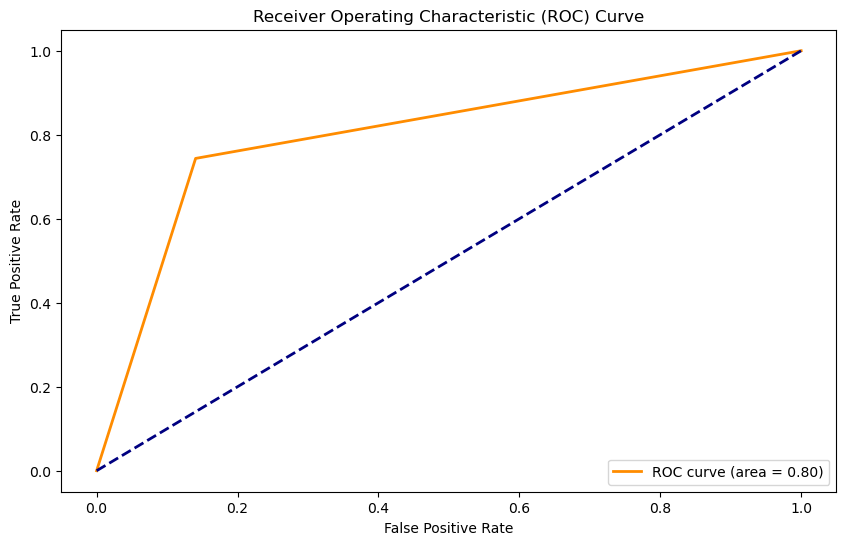

In [36]:
roc_auc = roc_auc_score(y_val, y_predict)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_predict)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 4. SVM model

In [37]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = clf.predict(X_test)

In [38]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_svm = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_svm)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[104  17]
 [ 11  28]]
Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       121
           1       0.62      0.72      0.67        39

    accuracy                           0.82       160
   macro avg       0.76      0.79      0.77       160
weighted avg       0.84      0.82      0.83       160



In [39]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_svm,recall_svm,fscore_svm,support_svm=score(y_val, y_pred)
print(precision_svm)

[0.90434783 0.62222222]


ROC-AUC Score: 0.7887264250900615


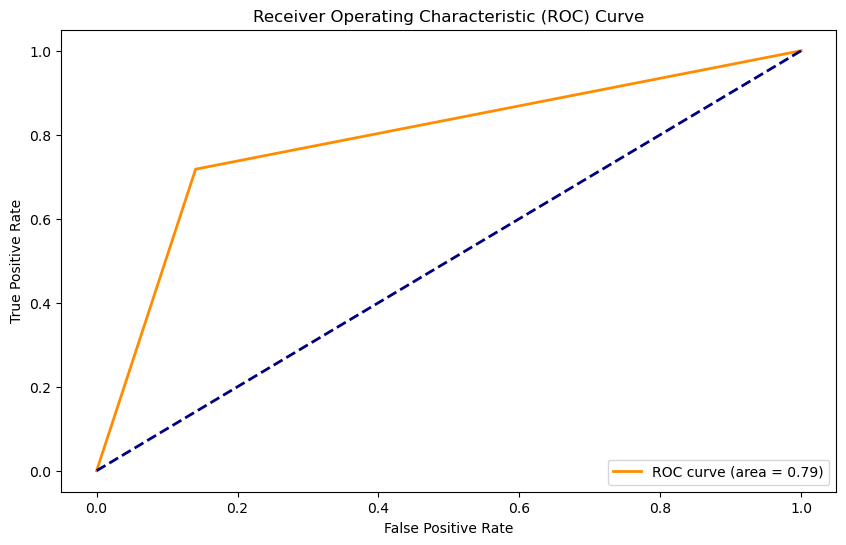

In [40]:
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 5. Logistic Regression model

In [41]:
#Import Linear model
from sklearn import linear_model

#Create a Logistic Regression Classifier
logr = linear_model.LogisticRegression()

#Fitting the Multiple Logistic Regression model
logr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logr.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = logr.predict(X_test)

In [42]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_logr = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_logr)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[104  17]
 [ 13  26]]
Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       121
           1       0.60      0.67      0.63        39

    accuracy                           0.81       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.82      0.81      0.82       160



In [43]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_logr,recall_logr,fscore_logr,support_logr=score(y_val, y_pred)
print(precision_logr)

[0.88888889 0.60465116]


ROC-AUC Score: 0.7630853994490358


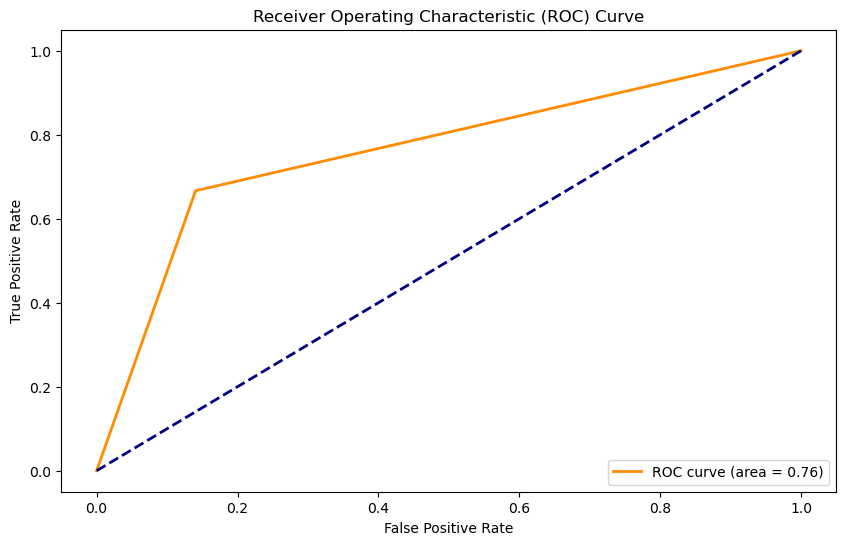

In [44]:
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 6. Naive Bayes

In [45]:
#Import GaussianNB model
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb.fit(X_train, y_train)

# Predict Output
y_pred = gnb.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = gnb.predict(X_test)

In [46]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_gnb = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_gnb)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[101  20]
 [  6  33]]
Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.89       121
           1       0.62      0.85      0.72        39

    accuracy                           0.84       160
   macro avg       0.78      0.84      0.80       160
weighted avg       0.87      0.84      0.84       160



In [47]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_gnb,recall_gnb,fscore_gnb,support_gnb=score(y_val, y_pred)
print(precision_gnb)

[0.94392523 0.62264151]


ROC-AUC Score: 0.8404322949777495


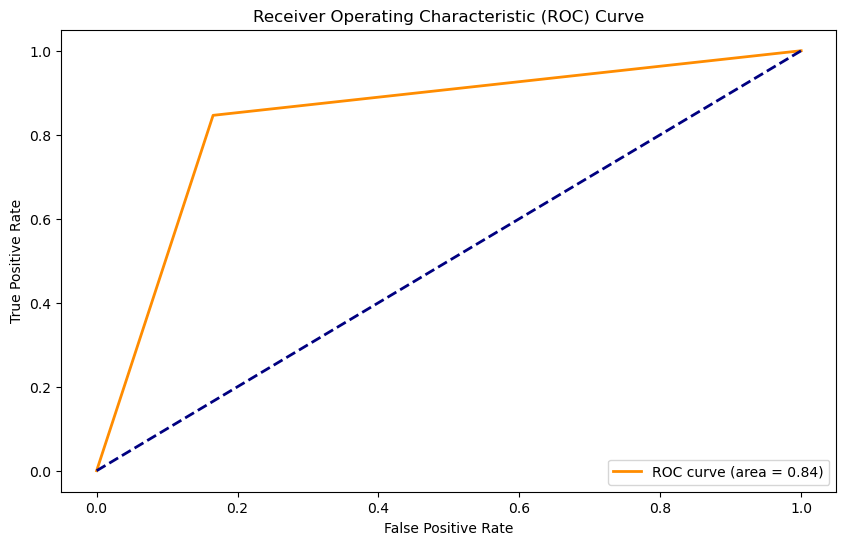

In [48]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 7. KNN

In [49]:
#Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Model training
knn.fit(X_train, y_train)

# Predict Output
y_pred = knn.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = knn.predict(X_test)

In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_knn = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_knn)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[103  18]
 [  9  30]]
Accuracy: 0.83125
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       121
           1       0.62      0.77      0.69        39

    accuracy                           0.83       160
   macro avg       0.77      0.81      0.79       160
weighted avg       0.85      0.83      0.84       160



In [51]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_knn,recall_knn,fscore_knn,support_knn=score(y_val, y_pred)
print(precision_knn)

[0.91964286 0.625     ]


ROC-AUC Score: 0.8102352193261284


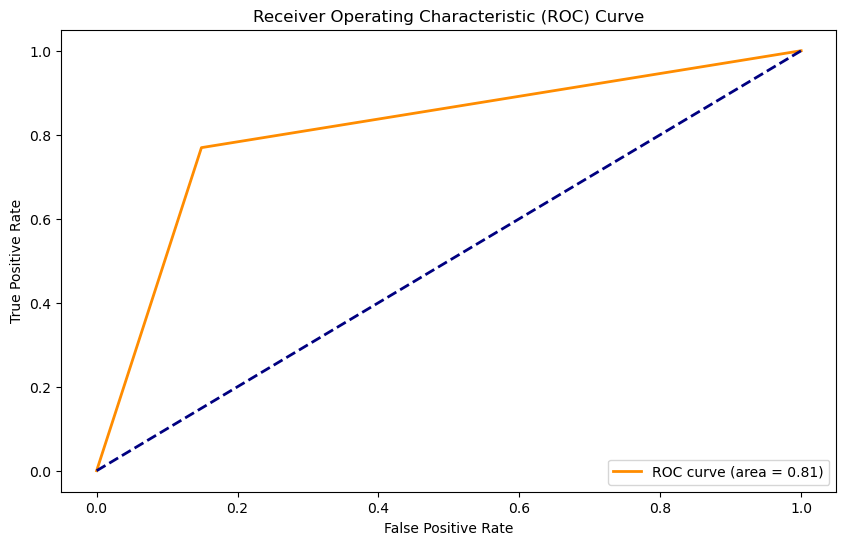

In [52]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 8 . XGB

In [106]:
# import XGBClassifier
from xgboost import XGBClassifier
          
# instantiate the classifier 
xgb_clf = XGBClassifier()

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Predict Output
y_pred = xgb_clf.predict(X_val)

In [107]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_xgb = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_xgb)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[107  14]
 [ 11  28]]
Accuracy: 0.84375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       121
           1       0.67      0.72      0.69        39

    accuracy                           0.84       160
   macro avg       0.79      0.80      0.79       160
weighted avg       0.85      0.84      0.85       160



In [108]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_xgb,recall_xgb,fscore_xgb,support_xgb=score(y_val, y_pred)
print(precision_xgb)

[0.90677966 0.66666667]


ROC-AUC Score: 0.8011231193049375


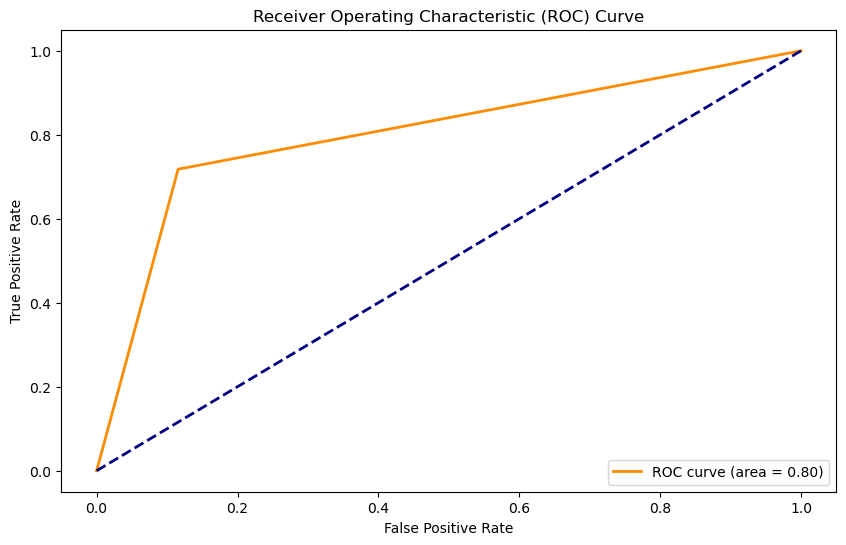

In [109]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 9 . CNN

In [57]:
classifier = Sequential()

# 1. Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (256, 256, 3), activation = 'relu'))

# 2. Max-Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a seecond convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening
classifier.add(Flatten())

# 4. Full-Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an instance of ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
training_set = train_datagen.flow_from_directory(
    'Dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Load testing data
test_set = test_datagen.flow_from_directory(
    'Dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Fit the model
classifier.fit(
    training_set,
    epochs=25,
    validation_data=test_set,
    steps_per_epoch=80,
    validation_steps=10
)

Found 2540 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/25
80/80 [==============================] - 38s 464ms/step - loss: 0.6597 - accuracy: 0.6130 - val_loss: 0.7686 - val_accuracy: 0.5733
Epoch 2/25
80/80 [==============================] - 33s 416ms/step - loss: 0.6033 - accuracy: 0.6898 - val_loss: 0.5348 - val_accuracy: 0.7200
Epoch 3/25
80/80 [==============================] - 33s 412ms/step - loss: 0.5730 - accuracy: 0.6980 - val_loss: 0.5335 - val_accuracy: 0.6967
Epoch 4/25
80/80 [==============================] - 33s 415ms/step - loss: 0.5727 - accuracy: 0.6957 - val_loss: 0.5168 - val_accuracy: 0.7200
Epoch 5/25
80/80 [==============================] - 33s 411ms/step - loss: 0.5483 - accuracy: 0.7106 - val_loss: 0.5033 - val_accuracy: 0.7533
Epoch 6/25
80/80 [==============================] - 33s 411ms/step - loss: 0.5426 - accuracy: 0.7154 - val_loss: 0.5036 - val_accuracy: 0.7633
Epoch 7/25
80/80 [==============================] - 33s 409

In [113]:
image_folder = 'Dataset/result'  # Folder with images to predict
true_labels = [] 
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        if 'Non' in filename:  # Non-Autistic -> 0 ; Autistic -> 1
            true_labels.append(0)
        else:
            true_labels.append(1)
            
# Load and Preprocess Images
def load_and_preprocess_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')): 
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=(256, 256))  # Resize to match the model's input shape
            img_array = img_to_array(img) / 255.0  # Normalize the image
            images.append(img_array)
    return np.array(images)

# Load images
X = load_and_preprocess_images(image_folder)
y = np.array(true_labels) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)

# Predict Output
y_pred = classifier.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
accuracy_cnn = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_cnn)

# Generate the Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

2/2 [==============================] - 0s 17ms/step
Confusion Matrix:
[[28  3]
 [ 5 24]]
Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.89      0.83      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [114]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_cnn,recall_cnn,fscore_cnn,support_cnn=score(y_val, y_pred)
print(precision_cnn)

[0.84848485 0.88888889]


ROC-AUC Score: 0.8654060066740822


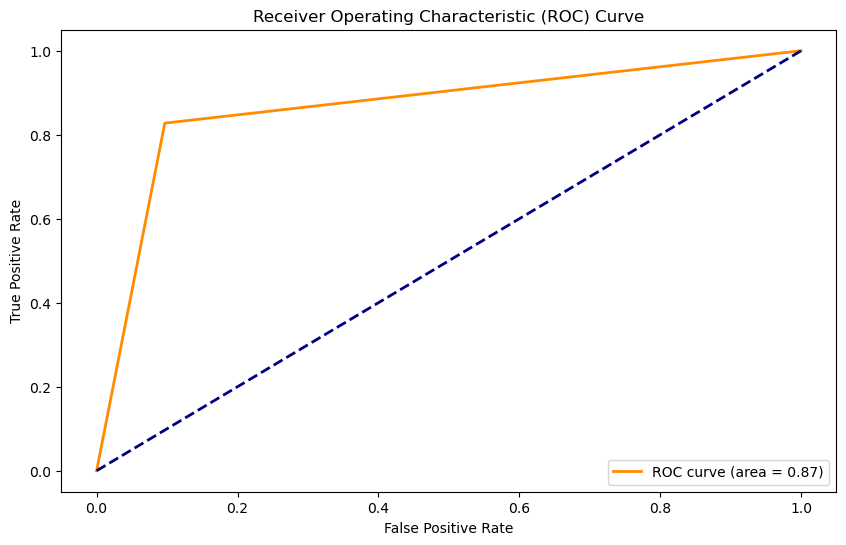

In [115]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Comparison of ANN, Decision Tree, Randoom Forest, SVM, Logistic Regression, Naive Bayes, KNN


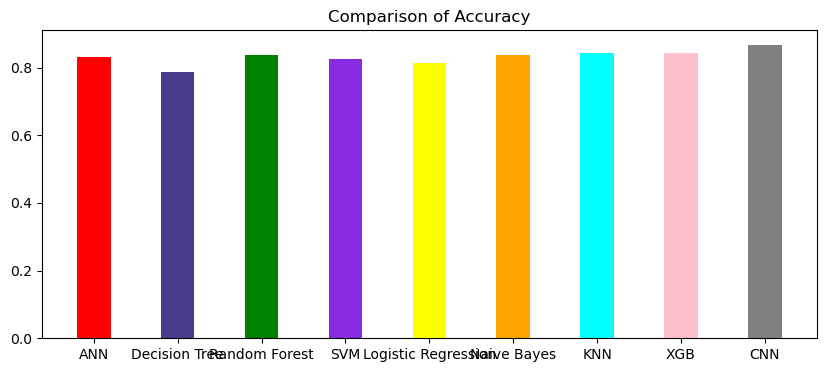

In [116]:
#Comparison of Accuracy
fig, ax2 = plt.subplots(figsize = (10, 4))
ax2.bar(['ANN', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 'Naive Bayes', 'KNN', 'XGB', 'CNN'], [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn, accuracy_xgb, accuracy_cnn], color=['red', 'darkslateblue', 'green', 'blueviolet', 'yellow', 'orange', 'cyan', 'pink', 'gray'], width = 0.4)

plt.title('Comparison of Accuracy')
plt.show()

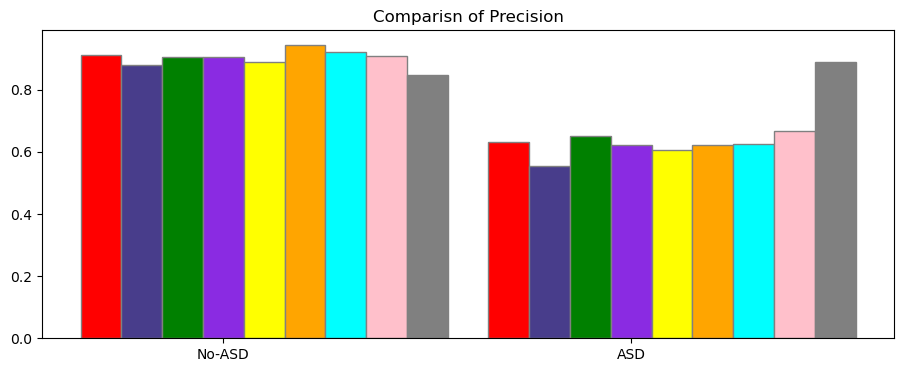

In [122]:
#Comparison of Precision 
barWidth = 0.1
fig = plt.subplots(figsize =(11, 4)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(precision_ANN)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
br7 = [x + barWidth for x in br6] 
br8 = [x + barWidth for x in br7] 
br9 = [x + barWidth for x in br8] 

# Make the plot
plt.bar(br1, precision_ANN, color ='r', width = barWidth, 
        edgecolor ='grey', label ='ANN') 
plt.bar(br2, precision_dt, color ='darkslateblue', width = barWidth, 
        edgecolor ='grey', label ='Decision Tree') 
plt.bar(br3, precision_rf, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Random Forest') 
plt.bar(br4, precision_svm, color ='blueviolet', width = barWidth, 
        edgecolor ='grey', label = 'SVM') 
plt.bar(br5, precision_logr, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Logistic Regression') 
plt.bar(br6, precision_gnb, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br7, precision_knn, color ='cyan', width = barWidth, 
        edgecolor ='grey', label ='KNN')
plt.bar(br8, precision_xgb, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='XGB')
plt.bar(br9, precision_cnn, color ='grey', width = barWidth, 
        edgecolor ='grey', label ='CNN')
 
# Adding Xticks 
plt.title('Comparisn of Precision')
plt.xticks([r + 3*barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])
 
# plt.legend()
plt.show() 

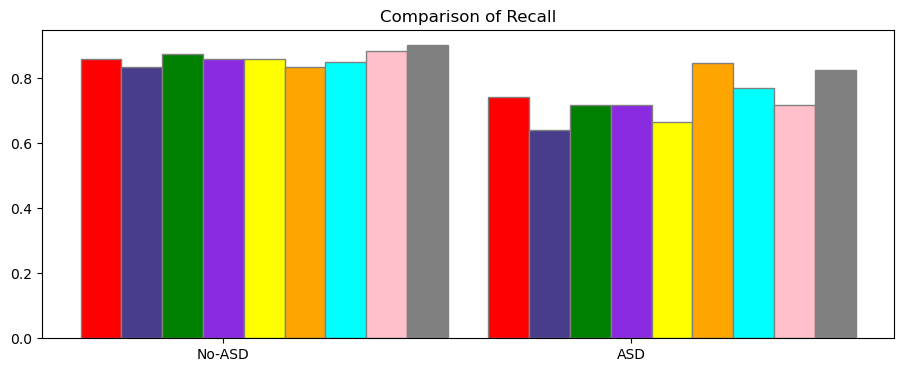

In [123]:
#Comparison of Recall
barWidth = 0.1
fig = plt.subplots(figsize =(11, 4)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(recall_ANN)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
br7 = [x + barWidth for x in br6] 
br8 = [x + barWidth for x in br7] 
br9 = [x + barWidth for x in br8] 

# Make the plot
plt.bar(br1, recall_ANN, color ='r', width = barWidth, 
        edgecolor ='grey', label ='ANN') 
plt.bar(br2, recall_dt, color ='darkslateblue', width = barWidth, 
        edgecolor ='grey', label ='Decision Tree') 
plt.bar(br3, recall_rf, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Random Forest') 
plt.bar(br4, recall_svm, color ='blueviolet', width = barWidth, 
        edgecolor ='grey', label ='SVM') 
plt.bar(br5, recall_logr, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Logistic Regression') 
plt.bar(br6, recall_gnb, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Naive Bayes') 
plt.bar(br7, recall_knn, color ='cyan', width = barWidth, 
        edgecolor ='grey', label ='KNN') 
plt.bar(br8, recall_xgb, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='XGB') 
plt.bar(br9, recall_cnn, color ='grey', width = barWidth, 
        edgecolor ='grey', label ='CNN')

# Adding Xticks 
plt.title('Comparison of Recall')
plt.xticks([r + 3*barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])
 
# plt.legend()
plt.show() 

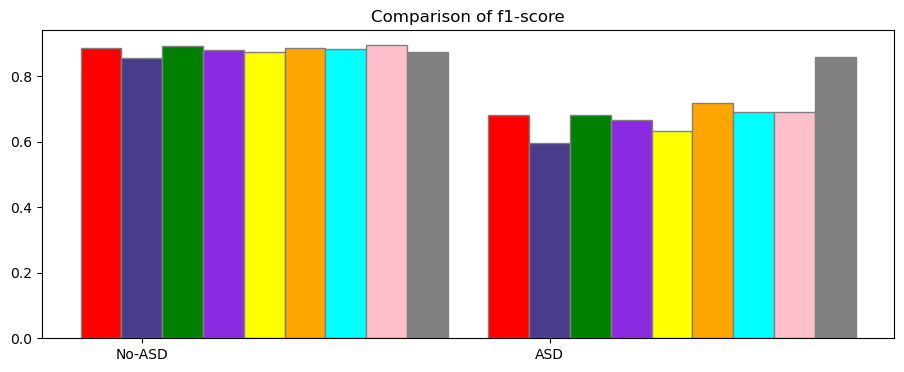

In [124]:
#Comparison of fscore
barWidth = 0.1
fig = plt.subplots(figsize =(11, 4)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(fscore_ANN)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
br7 = [x + barWidth for x in br6] 
br8 = [x + barWidth for x in br7] 
br9 = [x + barWidth for x in br8] 

# Make the plot
plt.bar(br1, fscore_ANN, color ='r', width = barWidth, 
        edgecolor ='grey', label ='ANN') 
plt.bar(br2, fscore_dt, color ='darkslateblue', width = barWidth, 
        edgecolor ='grey', label ='Decision Tree') 
plt.bar(br3, fscore_rf, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Random Forest') 
plt.bar(br4, fscore_svm, color ='blueviolet', width = barWidth, 
        edgecolor ='grey', label ='SVM') 
plt.bar(br5, fscore_logr, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Logistic Regression') 
plt.bar(br6, fscore_gnb, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Naive Bayes') 
plt.bar(br7, fscore_knn, color ='cyan', width = barWidth, 
        edgecolor ='grey', label ='KNN') 
plt.bar(br8, fscore_xgb, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='XGB')
plt.bar(br9, fscore_cnn, color ='grey', width = barWidth, 
        edgecolor ='grey', label ='CNN')

# Adding Xticks 
plt.title('Comparison of f1-score')
plt.xticks([r + barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])
 
# plt.legend()
plt.show() 

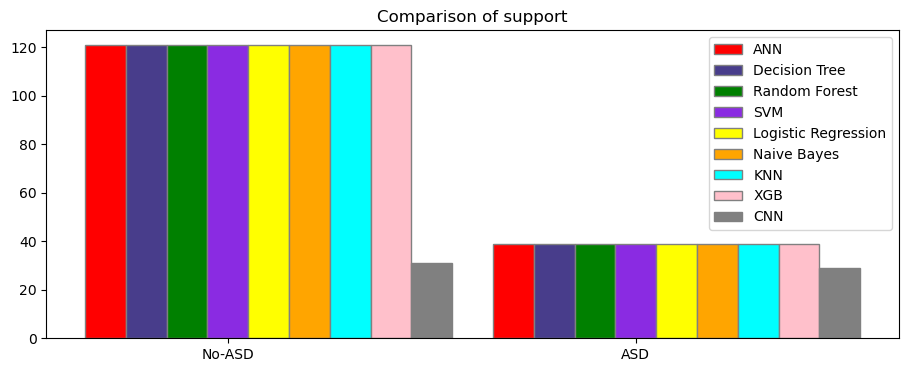

In [125]:
#Comparison of support
barWidth = 0.1
fig = plt.subplots(figsize =(11, 4)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(support_ANN)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
br7 = [x + barWidth for x in br6] 
br8 = [x + barWidth for x in br7] 
br9 = [x + barWidth for x in br8] 

# Make the plot
plt.bar(br1, support_ANN, color ='r', width = barWidth, 
        edgecolor ='grey', label ='ANN') 
plt.bar(br2, support_dt, color ='darkslateblue', width = barWidth, 
        edgecolor ='grey', label ='Decision Tree') 
plt.bar(br3, support_rf, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Random Forest') 
plt.bar(br4, support_svm, color ='blueviolet', width = barWidth, 
        edgecolor ='grey', label ='SVM') 
plt.bar(br5, support_logr, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Logistic Regression') 
plt.bar(br6, support_gnb, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Naive Bayes') 
plt.bar(br7, support_knn, color ='cyan', width = barWidth, 
        edgecolor ='grey', label ='KNN') 
plt.bar(br8, support_xgb, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='XGB')
plt.bar(br9, support_cnn, color ='grey', width = barWidth, 
        edgecolor ='grey', label ='CNN')

# Adding Xticks 
plt.title('Comparison of support')
plt.xticks([r + 3*barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])
 
plt.legend()
plt.show() 

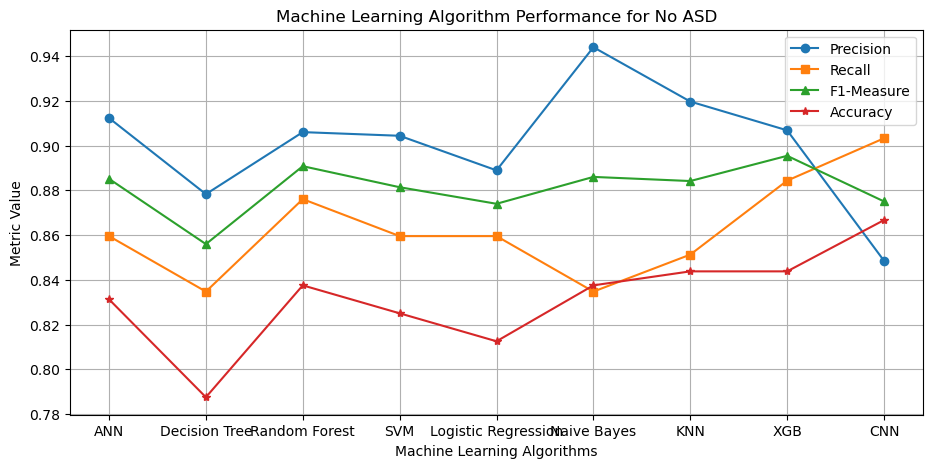

In [126]:
plt.figure(figsize=(11, 5))
algorithms = ["ANN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression", "Naive Bayes", "KNN", "XGB", "CNN"]

# Metric values (example data, replace with your actual values)
precision_ng = [precision_ANN[0], precision_dt[0], precision_rf[0], precision_svm[0], precision_logr[0], precision_gnb[0], precision_knn[0], precision_xgb[0], precision_cnn[0]]
recall_ng = [recall_ANN[0], recall_dt[0], recall_rf[0], recall_svm[0], recall_logr[0], recall_gnb[0], recall_knn[0], recall_xgb[0], recall_cnn[0]]
f1_measure_ng = [fscore_ANN[0], fscore_dt[0], fscore_rf[0], fscore_svm[0], fscore_logr[0], fscore_gnb[0], fscore_knn[0], fscore_xgb[0], fscore_cnn[0]]
accuracy_ng = [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn, accuracy_xgb, accuracy_cnn]

# Create multiple line plots
plt.plot(algorithms, precision_ng, label='Precision', marker='o')
plt.plot(algorithms, recall_ng, label='Recall', marker='s')
plt.plot(algorithms, f1_measure_ng, label='F1-Measure', marker='^')
plt.plot(algorithms, accuracy_ng, label='Accuracy', marker='*')

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Metric Value")
plt.title("Machine Learning Algorithm Performance for No ASD")

# Add legend
plt.legend()

# Grid for better readability (optional)
plt.grid(True)

# Show the plot
plt.show()

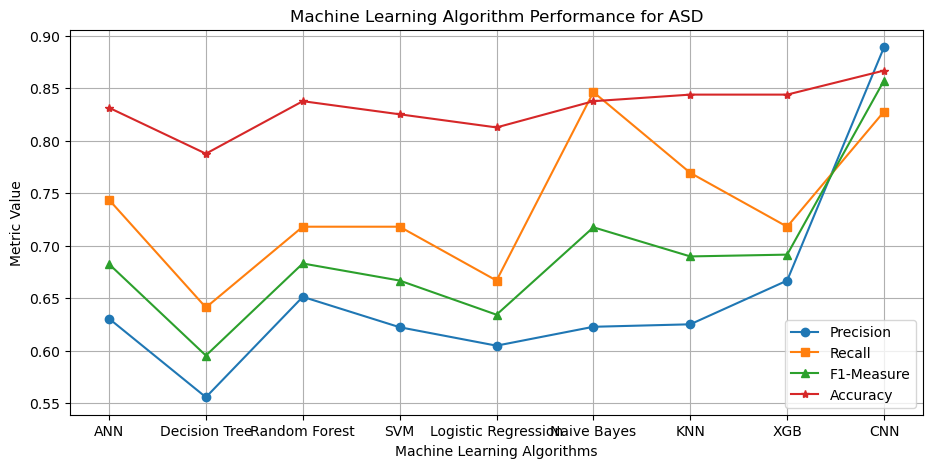

In [128]:
plt.figure(figsize=(11, 5))
algorithms = ["ANN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression", "Naive Bayes", "KNN", "XGB", "CNN"]

# Metric values (example data, replace with your actual values)
precision_ag = [precision_ANN[1], precision_dt[1], precision_rf[1], precision_svm[1], precision_logr[1], precision_gnb[1], precision_knn[1], precision_xgb[1], precision_cnn[1]]
recall_ag = [recall_ANN[1], recall_dt[1], recall_rf[1], recall_svm[1], recall_logr[1], recall_gnb[1], recall_knn[1], recall_xgb[1], recall_cnn[1]]
f1_measure_ag = [fscore_ANN[1], fscore_dt[1], fscore_rf[1], fscore_svm[1], fscore_logr[1], fscore_gnb[1], fscore_knn[1], fscore_xgb[1], fscore_cnn[1]]
accuracy_ag = [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn, accuracy_xgb, accuracy_cnn]

# Create multiple line plots
plt.plot(algorithms, precision_ag, label='Precision', marker='o')
plt.plot(algorithms, recall_ag, label='Recall', marker='s')
plt.plot(algorithms, f1_measure_ag, label='F1-Measure', marker='^')
plt.plot(algorithms, accuracy_ag, label='Accuracy', marker='*')

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Metric Value")
plt.title("Machine Learning Algorithm Performance for ASD")

# Add legend
plt.legend()

# Grid for better readability (optional)
plt.grid(True)

# Show the plot
plt.show()